In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
timber_df = pd.read_csv('Cleaned Timber Data.csv')

# Distribution Plots

#### Figure 1 in Report

Text(0, 0.5, 'Frequency')

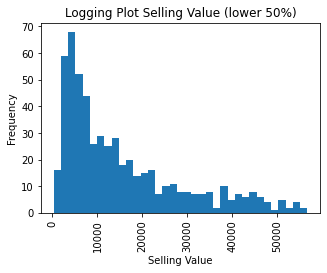

In [6]:
timber_subset = timber_df[timber_df['Value Sold']<=timber_df['Value Sold'].quantile(.5)]
timber_subset['Value Sold'].hist(bins=35,grid=False,figsize=(5,3.5))
plt.title('Logging Plot Selling Value (lower 50%)')
plt.xticks(rotation='vertical')
plt.xlabel('Selling Value')
plt.ylabel('Frequency')
#plt.savefig('EDA/selling_value_lower50.png',bbox_inches='tight')

Text(0, 0.5, 'Frequency')

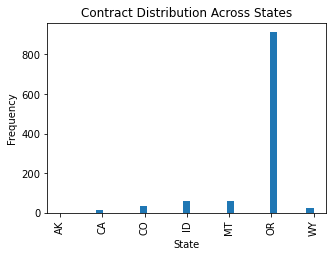

In [20]:
timber_df['State Office Code'].hist(bins=35,grid=False,figsize=(5,3.5))
plt.title('Contract Distribution Across States')
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Frequency')
#plt.savefig('EDA/state_distribution.png',bbox_inches='tight')

# Bar Charts

#### Figure 4 in Report

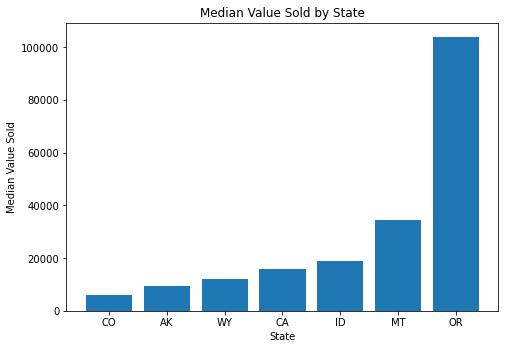

In [9]:
#plot of median value sold by state
unique_states = ['CO','AK','WY','CA','ID','MT','OR']
states_averages = []
for state in unique_states:
    state_subset = timber_df[timber_df['State Office Code']==state]
    states_averages.append(state_subset['Value Sold'].quantile(.5))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique_states,states_averages)
plt.title('Median Value Sold by State')
plt.xlabel('State')
plt.ylabel('Median Value Sold')
#plt.savefig('EDA/value_state.png',bbox_inches='tight')
plt.show()

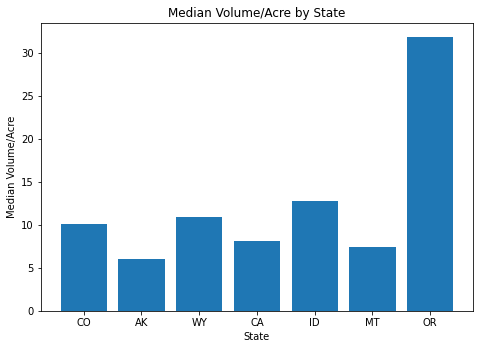

In [10]:
#plot of median volume.acre by state
timber_df['Volume per Acre'] = timber_df['Ccf Current']/timber_df['Acres Current']
unique_states = ['CO','AK','WY','CA','ID','MT','OR']
states_averages = []
for state in unique_states:
    state_subset = timber_df[timber_df['State Office Code']==state]
    states_averages.append(state_subset['Volume per Acre'].quantile(.5))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique_states,states_averages)
plt.title('Median Volume/Acre by State')
plt.xlabel('State')
plt.ylabel('Median Volume/Acre')
#plt.savefig('EDA/volume_acre_state.png',bbox_inches='tight')
plt.show()

# Scatterplots

#### Figure 2 in Report

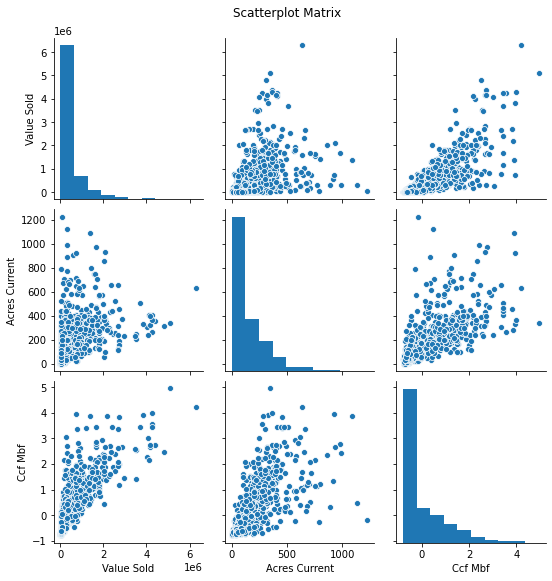

In [39]:
p = sns.pairplot(timber_df[['Value Sold','Acres Current','Ccf Mbf']])
p.fig.suptitle('Scatterplot Matrix',y=1.05)
#p.savefig("EDA/scatterplot_matrix.png")

#### Figure 3 in Report

Text(0, 0.5, 'Ccf')

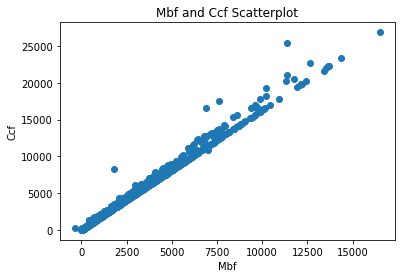

In [8]:
plt.scatter(timber_df['Mbf Current'],timber_df['Ccf Current'])
plt.title('Mbf and Ccf Scatterplot')
plt.xlabel('Mbf')
plt.ylabel('Ccf')
#plt.savefig('EDA/mbf_ccf_scatter.png',bbox_inches='tight')

# Correlations

In [42]:
timber_df[['Acres Current','Mbf Current','Ccf Current','Value Sold']].corr()

,Acres Current,Mbf Current,Ccf Current,Value Sold
Acres Current,1.000000,0.754785,0.760810,0.508864
Mbf Current,0.754785,1.000000,0.995841,0.831814
Ccf Current,0.760810,0.995841,1.000000,0.808656
Value Sold,0.508864,0.831814,0.808656,1.000000
